In [1]:
import pandas as pd
from pathlib import Path
from collections import defaultdict
from tqdm import tqdm_notebook

root_dir = Path.home() / 'workspace/WormData/screenings/CeNDR/Results'


#bn = 'worm-eggs-adam-masks+Feggs+roi128+hard-neg-5_clf+unet-simple_maxlikelihood_20190808_151948_adam_lr0.000128_wd0.0_batch64'
bn = 'AUG_worm-eggs-adam-masks+Feggs+roi128+hard-neg-5_clf+unet-simple_maxlikelihood_20190808_151948_adam_lr0.000128_wd0.0_batch64'

events_dir = Path.home() / 'workspace/WormData/egg_laying_test/' / bn

save_dir = events_dir / 'plots'
save_dir.mkdir(exist_ok = True)

#postfix = 'dist_from_cnt.csv'
postfix = 'dist_from_cnt_full.csv'

food_files = [x for x in events_dir.rglob('*' + postfix) if not x.name.startswith('.')]

dist_data = []
for fname in tqdm_notebook(food_files):
    strain_name = fname.stem.partition('_')[0]
    df = pd.read_csv(fname)
    df['strain_name'] = strain_name
    dist_data.append(df)

dist_data = pd.concat(dist_data)

dist_data['frame_number'].value_counts()

# data_by_strain = defaultdict(list)
# for fname in tqdm_notebook(food_files):
#     strain_name = fname.stem.partition('_')[0]
#     data_by_strain[strain_name].append(pd.read_csv(fname))

    
# for k in data_by_strain:
#     data_by_strain[k] = pd.concat(data_by_strain[k])
    

4    11162
1        4
3        3
0        2
2        1
Name: frame_number, dtype: int64

In [2]:
import matplotlib.pylab as plt
import seaborn as sns

DIVERGENT_SET = ['CB4856', 'N2',  'DL238', 'CX11314', 'MY23', 'JU775', 'JT11398',
       'EG4725', 'LKC34', 'ED3017', 'MY16', 'JU258']

divergent_set_data = dist_data[dist_data['strain_name'].isin(DIVERGENT_SET)].copy()

#valid = (divergent_set_data['dist_from_cnt'] > lims[0]) & (divergent_set_data['dist_from_cnt'] < lims[1])
lims = [-500, 500]
divergent_set_data['dist_from_cnt'] = divergent_set_data['dist_from_cnt'].clip(*lims)

fig = plt.figure(figsize = (15, 5))
ax = sns.violinplot(x="strain_name", y="dist_from_cnt", data=divergent_set_data)
#ax = sns.stripplot(x="strain_name", y="dist_from_cnt", data=divergent_set_data, color='k')
#ax = sns.swarmplot(x="strain_name", y="dist_from_cnt", data=divergent_set_data, color='k')

#ax.set_ylim(*lims)
plt.setp(ax.get_xticklabels(), rotation=45);






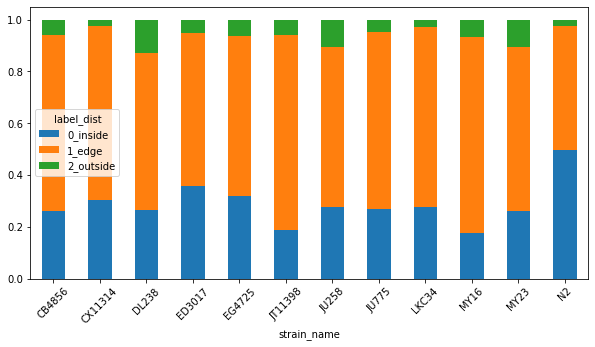

In [13]:
#https://github.com/mwaskom/seaborn/issues/1027#issuecomment-475091285

divergent_set_data = dist_data[dist_data['strain_name'].isin(DIVERGENT_SET)].copy()

def label_dist(x, lims = [-500, 500]):
    if x <= lims[0]:
        return '2_outside'
    elif x >= lims[1]:
        return '0_inside'
    else:
        return '1_edge'

divergent_set_data['label_dist'] = divergent_set_data['dist_from_cnt'].apply(label_dist)

props = divergent_set_data.groupby("strain_name")['label_dist'].value_counts(normalize=True).unstack()

ax = props.plot(kind='bar', stacked='True', figsize = (10, 5))
plt.setp(ax.get_xticklabels(), rotation=45);

plt.savefig(save_dir / 'distance_from_edge.pdf')
